<a href="https://colab.research.google.com/github/TanTruong24/CS114.L21-Machine-Learning/blob/main/Predict%20execution%20time/T_Predict_Execution_Time_of_a_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CS114.L21: MACHINE LEARNING**
##**Colab_#2: Dự đoán thời gian chạy của chương trình với tập dữ liệu thời gian thực thi**


##**I. YÊU CẦU**

- Từ dataset cho trước (data2.svc), hãy xây dựng model dự đoán thời gian thực thi của chương trình dựa vào kích thước dữ liệu đầu vào.
- Kiểm tra model trên trên 2 dataset là data3.txt và data4.svc sao cho sai số của dự đoán là nhỏ nhất.

##**II. THAM KHẢO**

1. [Reading and Writing CSV Files in Python with Pandas](https://stackabuse.com/reading-and-writing-csv-files-in-python-with-pandas/)
2. [Data visualization with Matplotlib](https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/)
3. [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
4. [Overfiting](https://machinelearningcoban.com/2017/03/04/overfitting/)
5. [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)
6. [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)

##**III. THỰC HIỆN**

### **1.  Nhập tất cả thư viện yêu cầu**

In [ ]:
# importing panda library
import pandas as pd

#  importing Matplotlib’s Pyplot module
import matplotlib.pyplot as plt

# importing numpy library
import numpy as np

# importing the LinearRegression class
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

###**2. Xử lý dữ liệu**

#### **2.1. Chuẩn bị dữ liệu .svc**

- Sử dụng thư viện pandas để đọc dữ liệu data2.txt, data3.txt và data4.txt sang định dạng file

In [ ]:
#import pandas as pd

# Xác định tên 2 cột 
col_names = ['Input size', 'Execution time']

# data2 được sử dụng làm data để train model, data3 và data4 được sử dụng để test
data_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names = col_names)
data_test3 = pd.read_csv("http://cs.uit.edu.vn/data3.txt", names = col_names)
data_test4 = pd.read_csv("http://cs.uit.edu.vn/data4.txt", names = col_names)

# In ra 5 dòng đầu tiên của data_train.svc
print(data_train.head())

   Input size  Execution time
0     6083695        0.521842
1     1954367        0.152648
2     3734185        0.298548
3     5839301        0.460480
4     6343427        0.527977


Sử dụng thư biện Matplotlib để thấy được dữ liệu data_train khi được trực quan hóa sẽ như thế nào.
- Đưa vào hai đối số x (trục hoành) là Input size và y (trục tung) là Execution time

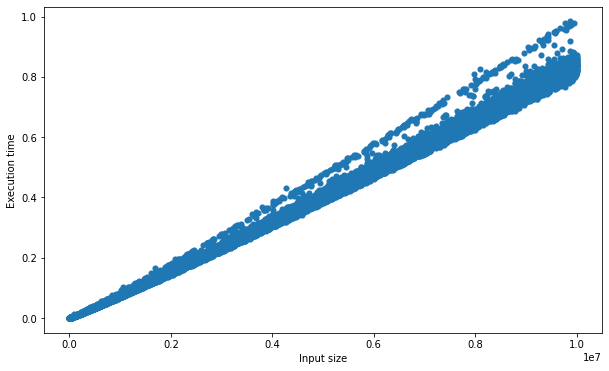

In [ ]:
#import matplotlib.pyplot as plt

# sử dụng biểu đồ scatter để trực quan hóa dữ liệu
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data_train['Input size'], y = data_train['Execution time'], linewidths = 0.1)
plt.xlabel("Input size")
plt.ylabel("Execution time")

plt.show()

- Nhóm cũng đặt tên các nhãn x và y để biểu thị cho các biến đại diện. 
- Có một mối tương quan thuận rõ ràng giữa hai biến này. Kích thước dữ liệu đầu vào càng lớn thì thời gian thực thi càng lớn.

####**2.2. Xác định giá trị biến X và Y**

- Bước này là chia dữ liệu thành ***thuộc tính*** và ***nhãn***.
  - **Thuộc tính**: là các biến độc lập 
  - **Nhãn**: là các biến phụ thuộc có giá trị được dự đoán.
 
- Trong tập dữ liệu data2, data3 và data4 chỉ có hai cột. Chúng ta muốn dự đoán ***thời gian thực thi*** tùy thuộc vào ***kích thước dữ liệu đầu vào***. 
- Do đó, tập thuộc tính của chúng ta sẽ là cột **Kích thước dữ liệu đầu vào** và nhãn sẽ là cột **thời gian thực thi**.
- Để trích xuất các thuộc tính và nhãn, thực thi tập lệnh sau:

In [ ]:
# dữ liệu dùng train model
X = np.array(data_train['Input size']).reshape(-1, 1)
Y = np.array(data_train['Execution time'])

# dữ liệu dùng để test model
X_test_3 = np.array(data_test3['Input size']).reshape(-1, 1)
Y_test_3 = np.array(data_test3['Execution time'])

X_test_4 = np.array(data_test4['Input size']).reshape(-1, 1)
Y_test_4 = np.array(data_test4['Execution time'])

###**2. Training**

####**2.1. Train model và predictions**

#####**2.1.1. Chia dataset và Train model và dự đoán**

In [ ]:
# Create linear regression object
lr = LinearRegression()

# Chia data2.svc thành 80% dữ liệu cho train model, 30% dữ liệu cho test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the model using the training sets
lr.fit(X_train, Y_train)

# Make predictions using the X_test in X (data2)
data_y_pred = lr.predict(X_test)

Mean squared error:  0.00014984181387564928


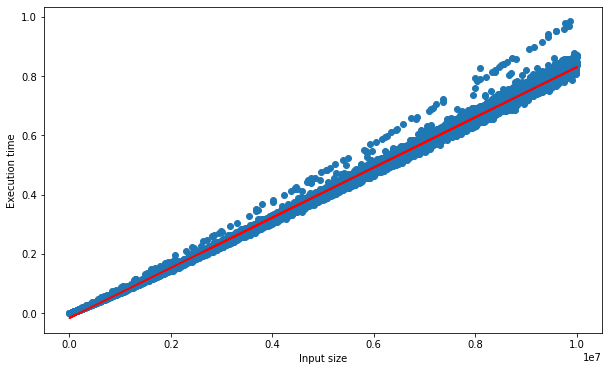

In [ ]:
#trực quan hóa dữ liệu dự đoán (X_test, Y_test) 
fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(X_test, Y_test)
axs.plot(X_test, data_y_pred, color='red', linewidth=2)
axs.set(xlabel = 'Input size', ylabel= 'Execution time')

# The mean squared error data2.svc or (X_test, Y_test)
print('Mean squared error: ', mean_squared_error(Y_test, data_y_pred))

- **Nhận xét:** trên tập dự liệu X_test và Y_test được chia ra từ data2.svc thì cho kết quả dự đoán tốt với MSE nhỏ 0.00014695461072091145

#####**2.1.2. Dự đoán với data3 và data4**

- Dự đoán với dataset data3.svc và data4.svc
- Trực quan hóa dữ liệu kết quả dự đoán cho data3 và data4 từ model

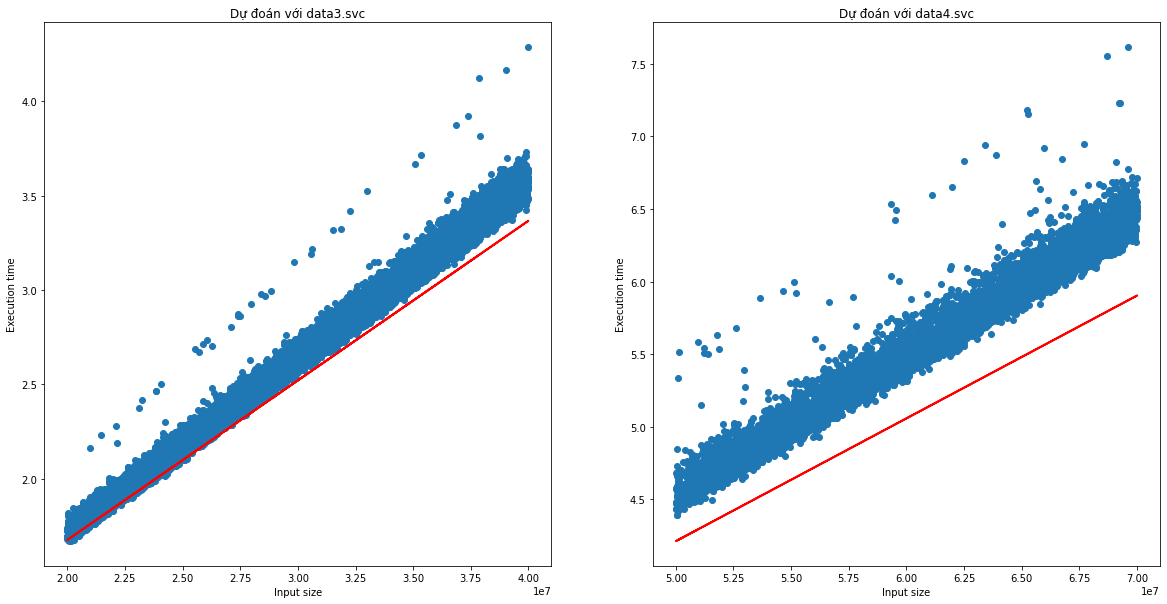

In [ ]:
# Make predictions using the X_test_3 in data_test3 (data3.svc)
data_y_pred_3 = lr.predict(X_test_3)

# Make predictions using the X_test_3 in data_test3 (data4.svc)
data_y_pred_4 = lr.predict(X_test_4)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
#trực quan hóa data3
ax1.scatter(X_test_3, Y_test_3)
ax1.plot(X_test_3, data_y_pred_3, color='red', linewidth=2)
ax1.set(title = 'Dự đoán với data3.svc',xlabel = 'Input size', ylabel= 'Execution time')

#trực quan hóa data4
ax2.scatter(X_test_4, Y_test_4)
ax2.plot(X_test_4, data_y_pred_4, color='red', linewidth=2)
ax2.set(title = 'Dự đoán với data4.svc', xlabel = 'Input size', ylabel= 'Execution time')

plt.show()


#####**2.2. Mean squared error**
- Tính toán **Mean squared error** *(MSE)* của data3 và data4 sau khi đã có kết quả dự doán từ model cho hai tập dữ liệu này.

In [ ]:
# The mean squared error data3.txt or (X_test_3, Y_test_3)
print('Mean squared error: ', mean_squared_error(Y_test_3, data_y_pred_3))

# The mean squared error data4.txt or (X_test_4, Y_test_4)
print('Mean squared error: ', mean_squared_error(Y_test_4, data_y_pred_4))

Mean squared error:  0.020587577450893072
Mean squared error:  0.222894242409781


####**2.3. Nhận xét**

- Mô hình bị overfiting khi áp dụng cho data3 và data4 cho kết quả khác nhau. Với data3 thì dự đoán chấp nhận được nhưng với data4 thì kết quả rất tệ và nhìn vào biểu đồ thì hầy như đường dự đoán lệnh hẳn so dữ liệu đúng.
- Cần phải tiền xử lý dữ liệu tốt hơn.